### Udacity /  Data Analyst Nanodegree 08'2016
### P2: Investigate a Dataset

### 1. ASSIGNMENT
Choose one of Udacity's curated datasets and investigate it using NumPy and Pandas. Go through the entire data analysis process, starting by posing a question and finishing by sharing your findings.

### 2. TOOLS
Import all required libraries and modules - numpy, pandas, matplotlib.pyplot and seaborn - to be able to produce calculations and plots in ipython notebook to analyze the titanic data.

In [47]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib import gridspec
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

### 3. DATA SET LOADING AND GENERAL REVIEW

#### 3.1 Loading Data

Titanic Data set - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. Quick glance to the data set.

In [2]:
filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3.2 Variable Descriptions

survival - Survival (0 = No; 1 = Yes)<br/>
pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br/>
name - Name<br/>
sex - Sex<br/>
age - Age<br/>
sibsp - Number of Siblings/Spouses Aboard<br/>
parch - Number of Parents/Children Aboard<br/>
ticket - Ticket Number<br/>
fare - Passenger Fare<br/>
cabin - Cabin<br/>
embarked - Port of Embarkation(C = Cherbourg; Q = Queenstown; S = Southampton)

#### 3.3 Investigating data for missing or invalid entries

To verify if there are any missing data, I am generating summary statistics of the data set. Result shows the count of 'Age' column is less than other numerical column counts, it has NaN values.

In [3]:
titanic_df.describe()

/Users/daivasatas/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- * -
To investigate numerical values of the data set in detail, I generate statistics after droping entries that have missing and/or NaN data. The resulted data set has lost too many entries to proceed with the analysis.  

In [4]:
titanic_df_dropna = titanic_df.dropna()
titanic_df_dropna.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


- * -
A count of non-empty fields in every text value column of data set.

In [5]:
titanic_df[['Name', 'Sex', 'Cabin', 'Embarked', 'Ticket']].count()

Name        891
Sex         891
Cabin       204
Embarked    889
Ticket      891
dtype: int64

- * -
Unique values and their count for columns 'Survived', 'Sex' and 'Pclass' to detect if there are non-unifom, mis-matched formats, any values with typographical errors needed correcting. The result is as expected.

In [6]:
print titanic_df['Survived'].value_counts(),'\n'
print titanic_df['Sex'].value_counts(),'\n'
print titanic_df['Pclass'].value_counts()

0    549
1    342
Name: Survived, dtype: int64 

male      577
female    314
Name: Sex, dtype: int64 

3    491
1    216
2    184
Name: Pclass, dtype: int64


#### 3.4 Creating the final data set for the analysis

The data review result shows that  'Cabin' and 'Embarked' columns have empty fields. I decided not to use these particular, as well as 'Name','SibSp','Parch','Fare' and 'Ticket' fields in my investigation,  <br>
Removing the above listed columns and generating the summary of the data set.

In [7]:
titanic_df = titanic_df.drop(['Cabin', 'Name', 'Embarked', 'Ticket','SibSp','Parch','Fare'], axis=1)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


- * -
Dropping non-numerical values in 'Age' column. And generating the updated statistics.

In [8]:
titanic_df = titanic_df.dropna(subset=['Age'])
titanic_df.describe()

,PassengerId,Survived,Pclass,Age
count,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118
std,259.119524,0.491460,0.838250,14.526497
min,1.000000,0.000000,1.000000,0.420000
25%,222.250000,0.000000,1.000000,20.125000
50%,445.000000,0.000000,2.000000,28.000000
75%,677.750000,1.000000,3.000000,38.000000
max,891.000000,1.000000,3.000000,80.000000


-*-
Adding a column 'Adult'  with values calculated based on passenger age. Values are 'adult' for age above or equal 18, or 'child' for age below 18 years old.

In [9]:
titanic_df['Adult']= titanic_df['Age'].apply(lambda x: 'adult' if x >= 18 else 'child')

-*-
Adding a column 'Pclass_name' for better visualization: 1 -> 'upper class', 2 -> 'middle class', 3 -> 'lower class'.

In [10]:
titanic_df['Pclass_name']= titanic_df['Pclass'].apply(lambda x: 'upper class' if x == 1\
                                                      else ('middle class' if x == 2 else 'lower class'))

-*-
Adding 'Sex_value' column with numerical values - will be used for correlation calculations: male -> 1, 2 -> female.

In [11]:
titanic_df['Sex_value']= titanic_df['Sex'].apply(lambda x: 1 if x == 'male' else 2)

- * -
The updated data set field information and summary I will be using in my investigation and analysis.

In [12]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Adult,Pclass_name,Sex_value
0,1,0,3,male,22.0,adult,lower class,1
1,2,1,1,female,38.0,adult,upper class,2
2,3,1,3,female,26.0,adult,lower class,2
3,4,1,1,female,35.0,adult,upper class,2
4,5,0,3,male,35.0,adult,lower class,1


In [13]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Sex            714 non-null object
Age            714 non-null float64
Adult          714 non-null object
Pclass_name    714 non-null object
Sex_value      714 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 50.2+ KB


### 4. RMS TITANIC PASSENGERS GENERAL REVIEW 

#### 4.1  "Titanic" total passenger proportions

Number of passengers on the RMS Titanic

In [14]:
titanic_df['Sex'].value_counts()

male      453
female    261
Name: Sex, dtype: int64

-*-
Proportions of passengers on the RMS Titanic

In [15]:
(titanic_df['Sex'].value_counts()/titanic_df['Sex'].count())*100

male      63.445378
female    36.554622
Name: Sex, dtype: float64

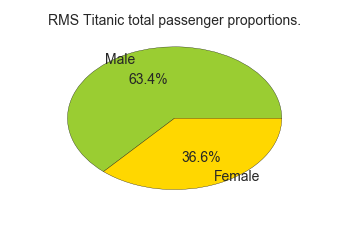

In [16]:
titanic_df['Sex'].value_counts().plot(
    kind='pie',
    colors=['yellowgreen', 'gold', 'orange'], 
    autopct='%1.1f%%',
    labels=['Male', 'Female'],
    fontsize=14,
    radius=0.8,
    labeldistance=0.9
)
plt.title('RMS Titanic total passenger proportions.', y =0.9, fontsize=14)
plt.ylabel('')

#### 4.2  "Titanic" female traveler proportions based on passenger class 

Creating a data set with passenger information for female passengers

In [17]:
titanic_df_f = titanic_df[(titanic_df.Sex == 'female')]

-*-
Number of female passengers based on passenger class on the RMS Titanic

In [18]:
titanic_df_f['Pclass_name'].value_counts()

lower class     102
upper class      85
middle class     74
Name: Pclass_name, dtype: int64

-*-
Proportion of female passengers based on passenger class on the RMS Titanic

In [19]:
(titanic_df_f['Pclass_name'].value_counts()/titanic_df_f['Pclass_name'].count())*100

lower class     39.08046
upper class     32.56705
middle class    28.35249
Name: Pclass_name, dtype: float64

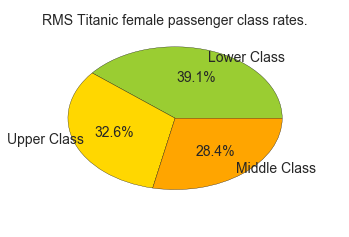

In [20]:
titanic_df_f['Pclass_name'].value_counts().plot(
    kind='pie',
    colors=['yellowgreen', 'gold', 'orange'], 
    autopct='%1.1f%%',
    labels=['Lower Class','Upper Class', 'Middle Class'],
    fontsize=14,
    radius=0.8,
    labeldistance=0.9
)
plt.title('RMS Titanic female passenger class rates.', y =0.9, fontsize=14)
plt.ylabel('')

#### 4.3  "Titanic" female travelers proportions based on passenger age

-*-
Number of female passengers based on their age groups - adult or child.

In [21]:
titanic_df_f['Adult'].value_counts()

adult    206
child     55
Name: Adult, dtype: int64

-*-
Proportion of female passengers based on their age group - adult or child.

In [22]:
(titanic_df_f['Adult'].value_counts()/titanic_df_f['Adult'].count())*100

adult    78.927203
child    21.072797
Name: Adult, dtype: float64

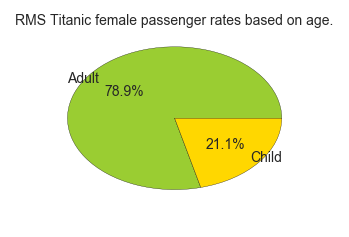

In [23]:
titanic_df_f['Adult'].value_counts().plot(
    kind='pie',
    colors=['yellowgreen', 'gold', 'orange'], 
    autopct='%1.1f%%',
    labels=['Adult', 'Child'],
    fontsize=14,
    radius=0.8,
    labeldistance=0.9
)
plt.title('RMS Titanic female passenger rates based on age.', y =0.9, fontsize=14)
plt.ylabel('')

### 6. RMS TITANIC PASSENGERS SURVIVAL ANALYSIS

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. (https://www.kaggle.com/c/titanic)<br/><br>
I am interested in women passenger survival. My goal is to explore the survival rates for women overall, comparing male and female survival. Also, survival based on their traveling class (upper, middle or lower). And lastly - survival based on 2 groups of age - adult and child. <br/>

The significance level, or the probability of rejecting the null hypothesis when it is true:<br>
α level: 0.05 / 5% 

### 6.1 Hyphotesis

Which gender had a higher chance of survival? I will look at how many males and females were on board and which gender had the higher survival rate.

H0: Gender has no impact on survivability<br/>
H1: Gender does impact the chances of survivability<br/>

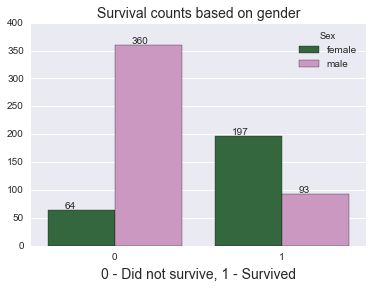

In [24]:
ax = sns.countplot(x="Survived",hue='Sex',data=titanic_df.sort_values(by=['Sex']),palette="cubehelix")
total = float(len(titanic_df))
plt.ylabel('')
plt.title('Survival counts based on gender',fontsize=14)
plt.xlabel('0 - Did not survive, 1 - Survived', fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.1, height+ 3, '%1.0f'%(height))

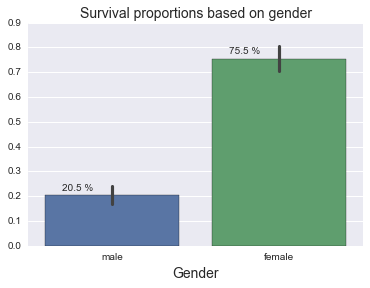

In [25]:
ax =sns.barplot(x="Sex", y="Survived",data=titanic_df)
total = float(len(titanic_df))
plt.xlabel('Gender', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Survival proportions based on gender',fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.1, height+0.02, '%1.1f'%(height*100)+' %')

-*-
Calculating the Pearson correlation coefficient to see relationship between gender and survivability. The coefficient is a measure of the strength of a linear association between two variables and describes the relationship between them. Input data: gender (female and male) values and their survival values.<br/>
The result is moderate positive, so the variables are positively related. This indicates that the gender had an impact on survivability.

In [26]:
def correlation(x, y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
        
    return (std_x*std_y).mean()
        
a = titanic_df['Sex_value']
b = titanic_df['Survived']

correlation = correlation(a,b)
print 'PCC =',correlation

PCC = 0.538825593015


-*-
Also, I am using Fisher’s exact test to compare data in order to determine if there is any association between them and support the correlation coefficient finding. Input data: total number of female and male passengers on board and the number of female and male survivors.

In [27]:
table_gender = pd.crosstab(titanic_df['Sex'],titanic_df['Survived'])
table_gender['total'] = table_gender[0] + table_gender[1]

In [28]:
# Number and proportions of Titanic survivors by gender
print table_gender

Survived    0    1  total
Sex                      
female     64  197    261
male      360   93    453


In [29]:
fem_survivor, male_survivor = table_gender[1]['female'], table_gender[1]['male']
print'female survivors =',fem_survivor
print'male survivor =',male_survivor

female survivors = 197
male survivor = 93


In [30]:
fem_passengers, male_passengers = table_gender['total']['female'], table_gender['total']['male']
print'female passengers =', fem_passengers
print'male passengers = ', male_passengers

female passengers = 261
male passengers =  453


In [31]:
oddsratio, pvalue = stats.fisher_exact([[fem_passengers ,male_passengers],[fem_survivor,male_survivor]])
print 'P-value =',pvalue

P-value = 1.31736282489e-19


As the Pearson correlation coefficient is moderately positive, and P-Value is less than significance level of 5%, the probability of that the gender will impact the chances of survival is high. Based on the data sample, the overall survival rate for men was 18%, for women it was 74%. Therefore, I reject the null hypothesis and conclude that gender does impact the chances of survivability

### 6.2 Hyphotesis

Which class of female passengers had a higher chance of survival? I will look at how many females in each class were on board and which class had the highest survival rate.

H0: Female passengers class has no impact on survivability<br/>
H1: Female passengers class does impact the chances of survivability<br/>

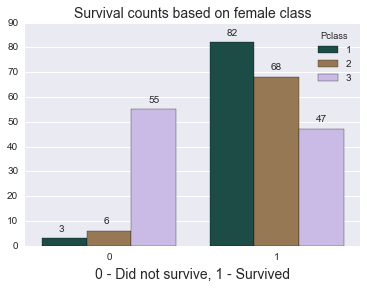

In [32]:
ax = sns.countplot(x="Survived",hue='Pclass',data=titanic_df_f.sort_values(by=['Pclass']),palette="cubehelix")
total = float(len(titanic_df_f))
plt.ylabel('', fontsize=14)
plt.title('Survival counts based on female class',fontsize=14)
plt.xlabel('0 - Did not survive, 1 - Survived', fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.1, height+ 3, '%1.0f'%(height))

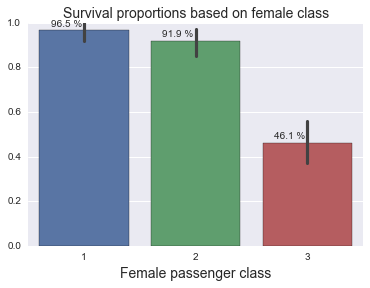

In [33]:
ax =sns.barplot(x="Pclass", y="Survived",data=titanic_df_f)
total = float(len(titanic_df_f))
plt.xlabel('Female passenger class', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Survival proportions based on female class',fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.1, height+0.02, '%1.1f'%(height*100)+' %')

-*-
Calculating the Pearson correlation coefficient to see relationship between female passenger class and survivability. Input data: passenger class (1,2,3) values and their survival values.<br/>
The result is moderate negative, so the variables are negatively related. This indicates that the class had an impact on survivability

In [34]:
def correlation(x, y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
        
    return (std_x*std_y).mean()
        
a = titanic_df_f['Pclass']
b = titanic_df_f['Survived']

correlation = correlation(a,b)
print 'PCC =',correlation

PCC = -0.504753355632


I am using Chi-square test for independence to compare data in order to determine if there is any association between them and support the correlation coefficient finding. Input data: total number of female passengers on board based on social class and the number of female survivors based on class.

In [35]:
table_class = pd.crosstab(titanic_df_f['Pclass_name'],titanic_df_f['Survived'])

In [36]:
table_class['total'] = table_class[0] + table_class[1]
print'Number and proportions of Titanic survivors by class:'
print table_class

Number and proportions of Titanic survivors by class:
Survived       0   1  total
Pclass_name                
lower class   55  47    102
middle class   6  68     74
upper class    3  82     85


In [37]:
surv_low, surv_mid, surv_up = table_class[1]['lower class'], table_class[1]['middle class'],table_class[1]['upper class']
print 'Female lower class survivors =',surv_low
print 'Female middle class survivors =',surv_mid
print 'Female upper class survivors =',surv_up

Female lower class survivors = 47
Female middle class survivors = 68
Female upper class survivors = 82


In [38]:
pass_low, pass_mid, pass_up = table_class['total']['lower class'],table_class['total']['middle class'],\
                              table_class['total']['upper class']
print 'Female lower class passengers =',pass_low
print 'Female middle class passengers =',pass_mid
print 'Female upper class passengers =',pass_up

Female lower class passengers = 102
Female middle class passengers = 74
Female upper class passengers = 85


In [39]:
table = pd.crosstab(titanic_df_f['Pclass'],titanic_df_f['Survived'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print 'P-value =',p

P-value = 8.36620540525e-18


As the Pearson correlation coefficient is moderately negative, and the P-Value is less than significance level of 5%, the probability of that the female class will impact the chances of survival is high. Therefore, I reject the null hypothesis and conclude that female class did have an impact on the chance of survivability.

### 6.3 Hyphotesis

What female age had a higher chance of survival? I will look at how many female adults and children were on board and which age had the higher survival rate. 

H0: Female passengers age has no impact on survivability.<br/>
H1: Female passengers age does impact the chances of survivability.<br/>

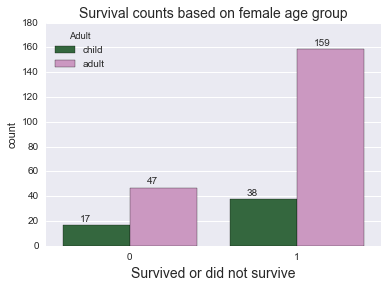

In [40]:
ax = sns.countplot(x="Survived",hue='Adult',data=titanic_df_f.sort_values(by=['Pclass_name']),palette="cubehelix")
total = float(len(titanic_df_f))
plt.title('Survival counts based on female age group',fontsize=14)
plt.xlabel('Survived or did not survive', fontsize=14)
ax.set_ylim(0,180)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.1, height+3, '%1.0f'%(height))

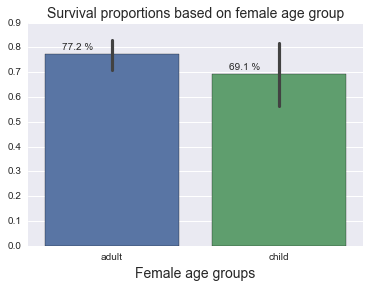

In [41]:
ax =sns.barplot(x="Adult", y="Survived",data=titanic_df_f)
total = float(len(titanic_df_f))
plt.xlabel('Female age groups', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Survival proportions based on female age group',fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.1, height+0.02, '%1.1f'%(height*100)+' %')

-*-
Calculating the Pearson correlation coefficient to see relationship between female passenger age and survivability. Input data: female passenger age group values and their survival values.<br/>

In [42]:
def correlation(x, y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
        
    return (std_x*std_y).mean()
        
a = titanic_df_f['Age']
b = titanic_df_f['Survived']

correlation = correlation(a,b)
print 'PCC =',correlation

PCC = 0.116108582457


-*-
I am using Fisher’s exact test to compare data in order to determine if there is any association between them. Input data: total number of female adult and female child passengers on board and the number of female and female child survivors.

In [43]:
table_age = pd.crosstab(titanic_df_f['Adult'],titanic_df_f['Survived'])
table_age['total'] = table_age[0] + table_age[1]
print table_age

Survived   0    1  total
Adult                   
adult     47  159    206
child     17   38     55


In [44]:
adult_survivor, child_survivor = table_age[1]['adult'], table_age[1]['child']
print 'Female adult survivor = ',adult_survivor
print 'Female child survivor = ',child_survivor

Female adult survivor =  159
Female child survivor =  38


In [45]:
adult_pass, child_pass = table_age['total']['adult'], table_age['total']['child']
print 'Female adult passenger = ',adult_pass
print 'Female adult passenger = ',child_pass

Female adult passenger =  206
Female adult passenger =  55


In [46]:
oddsratio, pvalue = stats.fisher_exact([[adult_survivor, child_survivor],[adult_pass, child_pass]])
print 'P-value =',pvalue

P-value = 0.72503812399


As the Pearson correlation coefficient is weak positive, so the variables are very slightly related. This indicates that the age groups did not have  an impact on survivability. The P-Value is more than significance level of 5%, so the probability of that the female age groups will impact the chances of survival is low. Therefore, I accept the null hypothesis and conclude that female age did not impact the chances of survivability

### 6. CONCLUSION

Based on the calculations and observations, I believe that first class women of all ages had the highest chance to survive.  <br>
For this analysis there are some limitations with the Titanic dataset. First - it is not a full passenger data set, just a sample set, which could skew the results. It is possible to acquire a new sample and re-run the calculations. The biggest limitation is the incomplete data entries, with missing or incorrect values, which is no longer possible to acquire.<br>

To have more accurate results for my analysis, it would help to have one more variable indicating if person (female in my case) is a passenger or a crew member. If there were female crew members, they (I am assuming) were trained and helped with the whole rescue operation. They might have left the boat last, or didn't survive. They most likely were assigned to lower passenger class. That would change slightly the results.

#### RECOURSES:
http://www.ultimatetitanic.com/facts-statistics/#.V60PRpMrKHp

https://www.kaggle.com/c/titanic

http://www.historyonthenet.com/titanic/passengers.htm

http://matplotlib.org/1.2.1/examples/pylab_examples/barchart_demo.html

http://stackoverflow.com/questions/10388462/matplotlib-different-size-subplots

https://blogtanic.wordpress.com/tag/titanic-survival-rates/

http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.unique.html

http://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html

http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.fisher_exact.html
